# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Bùi Nguyễn Nhật Minh
- MSSV: 21127105
- Lớp: 21CLC08

# Import

In [18]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold

# Đọc dữ liệu

In [19]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [20]:
# Cài đặt các hàm cần thiết ở đây

# code hồi quy tuyến tính trong bài trước
class OLSLinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        return self.w


    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)   

# hàm MAE từ bài trước
def mae(y, y_hat):
    return np.mean(np.abs(y.ravel() - y_hat.ravel()))

def preprocess(x):
    X = np.hstack((np.ones((x.shape[0], 1)), x))
    return X

# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [21]:
# Phần code cho yêu cầu 1a
#lấy dữ liệu
X_train_1a = X_train.iloc[:,:11]
y_train_1a = y_train[:]

X_test_1a = X_test.iloc[:, :11]      
y_test_1a = y_test.iloc[:]

X_test_1a =preprocess(X_test_1a)
X_train_1a = preprocess(X_train_1a)

model = OLSLinearRegression().fit(X_train_1a, y_train_1a)
print(model.get_params())


[ 49248.08973674 -23183.32950746    702.76679168   1259.01878787
 -99570.60814072  18369.96245081   1297.53200035  -8836.72712321
    141.75993906    145.74234653    114.64331341  34955.75040842]


In [22]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(X_test_1a)
print('MAE:', mae(y_test_1a, y_hat))

MAE: 105052.52978843228


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$
\text{Salary} = 49248.089 -23183.329 \times \text{Gender} + 702.766 \times \text{10percentage} + 1259.018 \times \text{12percentage} \\ - 99570.608 \times \text{CollegeTier} + 18369.962 \times \text{Degree}
+ 1297.532 \times \text{collegeGPA} \\ - 8836.727 \times \text{CollegeCityTier} + 141.759 \times \text{English}
+ 145.742 \times \text{Logical} \\ + 114.643 \times \text{Quant} + 34955.750 \times \text{Domain}
$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [23]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

# Đọc dữ liệu
features = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Khởi tạo mô hình quy hồi tuyến tính
model = OLSLinearRegression()

# Số lượng fold
num_folds = 5

# Cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
list_mae = []

for feature in features:
    sum_mae = 0
    
    # Chọn cột tương ứng với feature đang xét
    X_train_feature = X_train[[feature]]
    X_train_feature_pre = preprocess(X_train_feature)
    for train_index, test_index in kf.split(X_train_feature_pre):
        train_X, test_X = X_train_feature_pre[train_index], X_train_feature_pre[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model.fit(train_X, train_y)
        
        y_pred = model.predict(test_X)
        
        sum_mae += mae(test_y, y_pred)
    
    avg_mae = sum_mae / num_folds
    list_mae.append([feature, avg_mae])

sorted_mae = sorted(list_mae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('The best personality is:', min_mae[0])

prediction = pd.DataFrame(sorted_mae, columns=['Feature', 'MAE'])
print(prediction)



The best personality is: nueroticism
                 Feature            MAE
0            nueroticism  123473.399787
1          agreeableness  123706.054730
2           extraversion  123809.926200
3  openess_to_experience  123818.333575
4      conscientiousness  124182.563823


In [24]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

#lấy đặc trưng tốt nhất
X_train_best = X_train[min_mae[0]].values.reshape(-1, 1)
X_train_best_pre = preprocess(X_train_best)

best_personality_feature_model = OLSLinearRegression().fit(X_train_best_pre, y_train)
print(best_personality_feature_model.get_params())

[304647.55255226 -16021.49366179]


In [25]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
X_test_best = X_test[min_mae[0]].values.reshape(-1, 1)
X_test_best_pre = preprocess(X_test_best)
y_hat_best = best_personality_feature_model.predict(X_test_best_pre)
print('MAE:', mae(y_test, y_hat_best))

MAE: 119361.91739987818


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 304647.552 - 16021.493\times \text{nueroticism  }

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [26]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu


features = ['English', 'Logical', 'Quant']

# Khởi tạo mô hình quy hồi tuyến tính
model = OLSLinearRegression()

# Số lượng fold
num_folds = 5

# Cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

list_mae = []

for feature in features:
    sum_mae = 0
    
    # Chọn cột tương ứng với feature đang xét
    X_train_feature = X_train[[feature]]
    X_train_feature_pre = preprocess(X_train_feature)
    for train_index, test_index in kf.split(X_train_feature_pre):
        train_X, test_X = X_train_feature_pre[train_index], X_train_feature_pre[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model.fit(train_X, train_y)
        
        y_pred = model.predict(test_X)
        
        sum_mae += mae(test_y, y_pred)
    
    avg_mae = sum_mae / num_folds
    list_mae.append([feature, avg_mae])

sorted_mae = sorted(list_mae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('The best skill feature is:', min_mae[0])

prediction = pd.DataFrame(sorted_mae, columns=['Feature', 'MAE'])
print(prediction)



The best skill feature is: Quant
   Feature            MAE
0    Quant  117353.838031
1  Logical  119932.503599
2  English  120728.603666


In [27]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

#lấy đặc trưng tốt nhất
X_train_best = X_train[min_mae[0]].values.reshape(-1, 1)
X_train_best_pre = preprocess(X_train_best)

best_skill_feature_model = OLSLinearRegression().fit(X_train_best_pre, y_train)
print(best_skill_feature_model.get_params())


[117759.72931231    368.85246384]


In [28]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
X_test_best = X_test[min_mae[0]].values.reshape(-1, 1)
X_test_best_pre = preprocess(X_test_best)
y_hat_best = best_skill_feature_model.predict(X_test_best_pre)
print('MAE:', mae(y_test, y_hat_best))


MAE: 108814.0596883719


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 117759.729 + 368.852 \times \text{Quant}

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

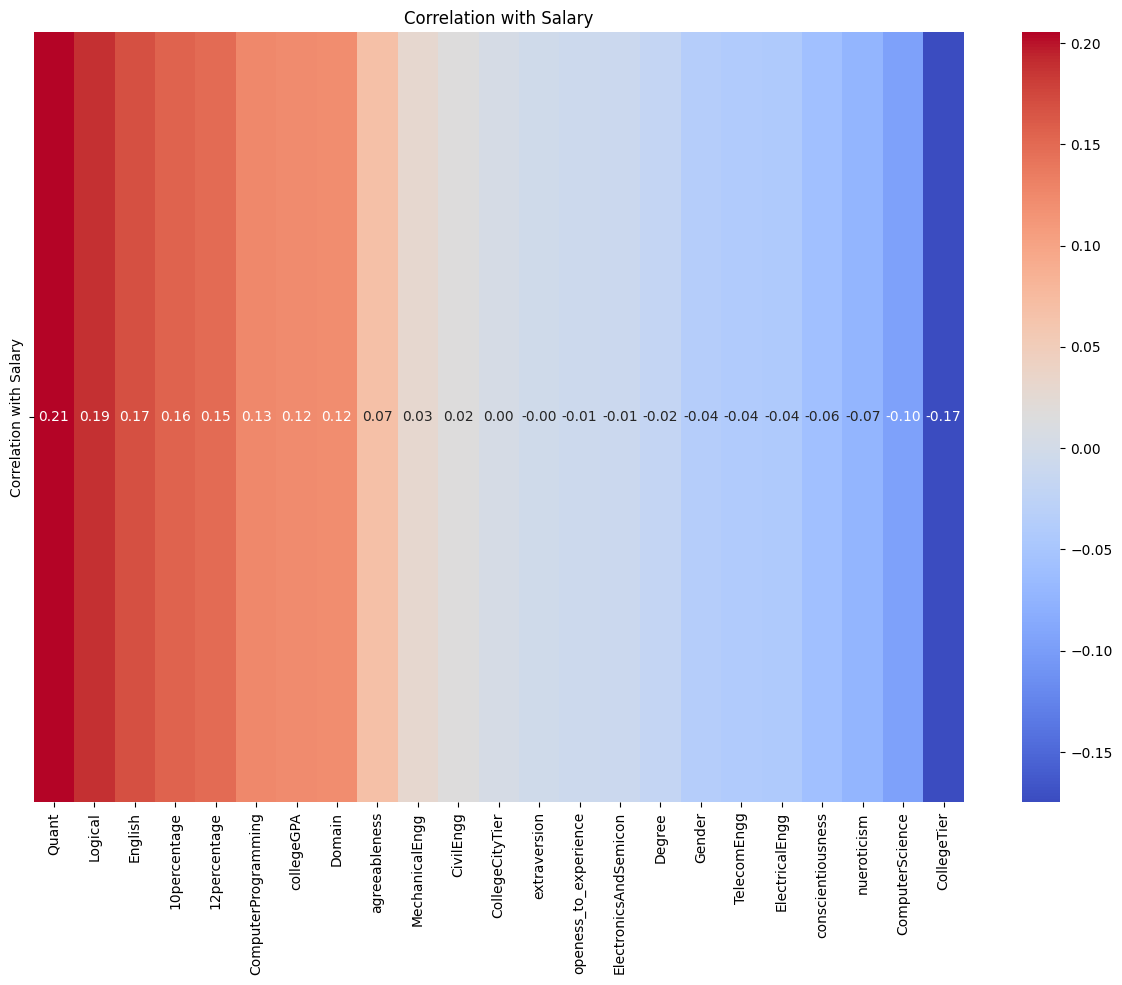

In [29]:
# Trình bày các phần tìm ra mô hình

# Tạo ma trận tương quan giữa các đặc trưng và biến mục tiêu
correlations_with_salary = X_train.corrwith(y_train)

# Tạo DataFrame từ Series
correlations_df = pd.DataFrame(correlations_with_salary, columns=['Correlation with Salary'])

# Sắp xếp theo mức độ tương quan giảm dần
correlations_df = correlations_df.sort_values(by='Correlation with Salary', ascending=False)

# Vẽ biểu đồ heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlations_df.transpose(), cmap="coolwarm", annot=True, fmt=".2f", ax=ax)

plt.title("Correlation with Salary")
plt.show()

## Thử nghiệm, so sánh các mô hình

In [30]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

# MÔ HÌNH 1 -----------------------------------
def model_1():
        X_train_new = X_train.iloc[:, 1:11].copy()
        X_train_new['Quant_nueroticism'] = X_train['Quant'] * X_train['nueroticism']
        X_train_new = preprocess(X_train_new)

        X_test_new = X_test.iloc[:, 1:11].copy()
        X_test_new['Quant_nueroticism'] = X_test['Quant'] * X_test['nueroticism']
        X_test_new = preprocess(X_test_new)

        return X_train_new, X_test_new
# ---------------------------------------------

# MÔ HÌNH 2 -----------------------------------
def model_2():
        features_2 = [        
                "10percentage",
                "12percentage",
                "CollegeTier",
                "Degree",
                "collegeGPA",
                "CollegeCityTier",
                "English",
                "Logical",
                "Quant",
                "Domain",
                "ComputerProgramming",
                "openess_to_experience"
        ]

        X_train_new = X_train[features_2].copy()
        X_train_new['nueroticism_cubed'] = X_train['nueroticism'] ** 3
        X_train_new['Quant_nueroticism'] = X_train['Quant'] * X_train['nueroticism']
        X_train_new = preprocess(X_train_new)

        X_test_new = X_test[features_2].copy()
        X_test_new['nueroticism_cubed'] = X_test['nueroticism'] ** 3
        X_test_new['Quant_nueroticism'] = X_test['Quant'] * X_test['nueroticism']
        X_test_new = preprocess(X_test_new)

        return X_train_new, X_test_new
# ---------------------------------------------

# MÔ HÌNH 3 -----------------------------------
def model_3():
        feature_3 = [        
                "10percentage",
                "English",
                "Logical",
                "Quant",
                "nueroticism"
        ]

        X_train_new = X_train[feature_3].copy()
        X_train_new['nueroticism_cubed'] = X_train['nueroticism'] ** 3
        X_train_new['Quant_cubed'] = X_train['Quant'] ** 3
        X_train_new['Quant_square'] = X_train['Quant']**2
        X_train_new['nueroticism_squarer'] = X_train['nueroticism']**2
        X_train_new = preprocess(X_train_new)

        X_test_new = X_test[feature_3].copy()
        X_test_new['nueroticism_cubed'] = X_test['nueroticism'] ** 3
        X_test_new['Quant_cubed'] = X_test['Quant'] ** 3
        X_test_new['Quant_square'] = X_test['Quant']**2
        X_test_new['nueroticism_squarer'] = X_test['nueroticism']**2
        X_test_new = preprocess(X_test_new)
        return X_train_new, X_test_new
# ---------------------------------------------

X_train_all_model, X_test_all_model = [], []
# Mô hình 1
X_train_new, X_test_new = model_1()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Mô hình 2
X_train_new, X_test_new = model_2()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Mô hình 3
X_train_new, X_test_new = model_3()
X_train_all_model.append(X_train_new)
X_test_all_model.append(X_test_new)

# Khởi tạo mô hình
model = OLSLinearRegression()

# Số lượng fold
num_folds = 5

# Cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

list_mae = []
index = 0
for X_train_model in X_train_all_model:
    index +=1
    sum_mae = 0
    for train_index, test_index in kf.split(X_train_model):
        train_X, test_X = X_train_model[train_index], X_train_model[test_index]
        train_y, test_y = y_train.iloc[train_index], y_train.iloc[test_index]
        
        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)
        
        fold_mae = mae(test_y, y_pred)
        sum_mae += fold_mae

    avg_mae = sum_mae / num_folds
    list_mae.append([f"model_{index}",avg_mae])

sorted_mae = sorted(list_mae, key=lambda x: x[1])
min_mae = sorted_mae[0]
print('Mô hình tốt nhất là :', min_mae[0])

prediction = pd.DataFrame(sorted_mae, columns=['Model', 'MAE'])
print(prediction)

Mô hình tốt nhất là : model_2
     Model            MAE
0  model_2  113495.912676
1  model_1  113637.708040
2  model_3  115092.132855


In [31]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

#lấy mô hình tốt nhất
best_model_train, best_model_test = model_1()
if min_mae[0] == 'model_2':
  best_model_train, best_model_test = model_2()
elif min_mae[0] == 'model_3':
  best_model_train, best_model_test = model_3()

my_best_model = OLSLinearRegression().fit(best_model_train, y_train)
for co in my_best_model.get_params():
    co = "{:.3f}".format(co)
    print(co)

54566.200
628.517
1140.334
-100810.331
12114.761
1003.468
-9897.619
137.011
119.559
124.330
25996.491
68.762
-4067.990
698.259
-12.170


In [32]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
y_hat_best = my_best_model.predict(best_model_test)
print('MAE:', mae(y_test, y_hat_best))

MAE: 104265.58564021446


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$
\text{Salary} = 54566.200 - 628.517 \times \text{10percentage} + 1140.334 \times \text{12percentage} - 100810.331 \times \text{CollegeTier} + 12114.761 \times \text{Degree} + 1003.468 \times \text{collegeGPA} \\
- 9897.619 \times \text{CollegeCityTier} + 137.011 \times \text{English} + 119.559 \times \text{Logical}
+ 124.330 \times \text{Quant} \\ + 25996.491 \times \text{Domain} + 68.762 \times \text{ComputerProgramming} - 4067.990 \times \text{openess to experience} + 698.259 \times \text{nueroticism cubed} \\ - 12.170 \times \text{Quant nueroticism}
$$